# ЛАБОРАТОРНА РОБОТА №2

## Цифрова стеганографія засобами найменш значущогобіта

In [2]:
import cv2
import numpy as np
import imageio
from matplotlib import pyplot as plt

### 1.1 Виконати вбудовування водяного знаку зображення.

(np.float64(-0.5), np.float64(245.5), np.float64(150.5), np.float64(-0.5))

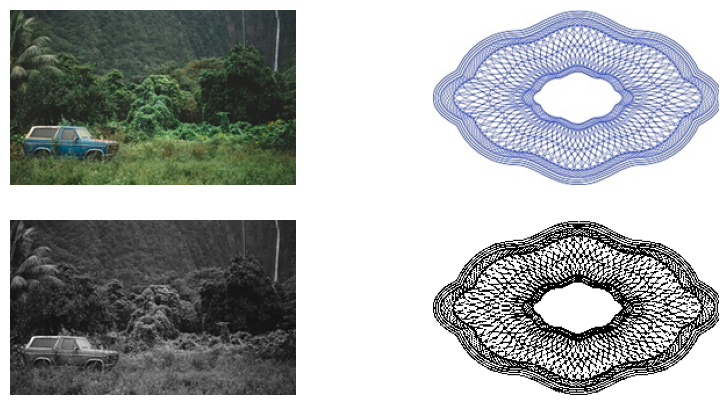

In [3]:
img = cv2.imread('InputImage.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

wm = cv2.imread('WM.png')
wm = cv2.cvtColor(wm, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(wm)
plt.axis("off")

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray_wm = cv2.cvtColor(wm, cv2.COLOR_BGR2GRAY)
_, bin_wm = cv2.threshold(gray_wm, 190, 255, cv2.THRESH_BINARY)

plt.subplot(2, 2, 3)
plt.imshow(gray_img, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(bin_wm, cmap="gray")
plt.axis("off")

(np.float64(-0.5), np.float64(245.5), np.float64(150.5), np.float64(-0.5))

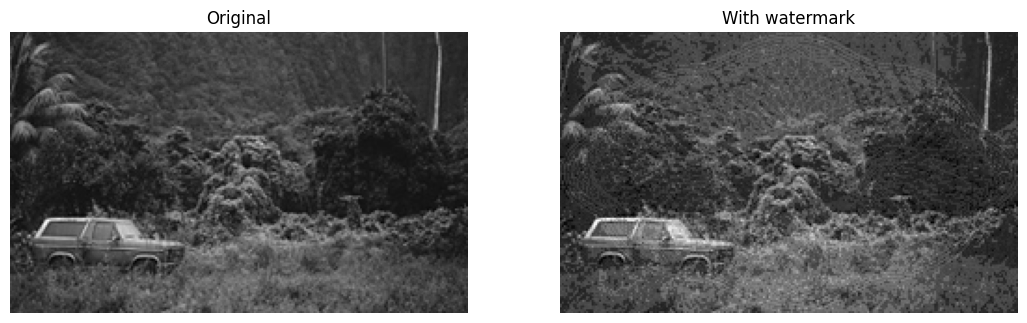

In [4]:
def build_wm(image, bit_plane):
    
    bit_mask = np.uint8(1 << (bit_plane - 1))
    new_image = (image & ~bit_mask) | ((bin_wm == 0)  * bit_mask)
    
    return new_image

bit_plane = 5
img_with_wm = build_wm(gray_img, bit_plane)  

fig, axes = plt.subplots(1, 2, figsize=(13, 4))

axes[0].imshow(gray_img, cmap="gray")
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(img_with_wm, cmap="gray")
axes[1].set_title("With watermark")
axes[1].axis("off")

(np.float64(-0.5), np.float64(245.5), np.float64(150.5), np.float64(-0.5))

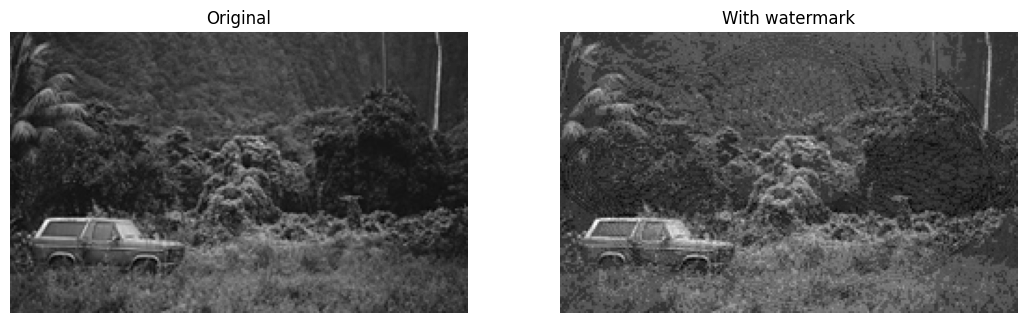

In [5]:
def build_wm(image, watermark, bit_plane):

    bit_mask = np.uint8(1 << (bit_plane - 1))
    
    wm_resized = np.tile(watermark, (image.shape[0] // watermark.shape[0] + 1, image.shape[1] // watermark.shape[1] + 1))
    wm_resized = wm_resized[:image.shape[0], :image.shape[1]]
    wm_binary = (wm_resized > 128).astype(np.uint8)
    
    new_image = (image & ~bit_mask) | (wm_binary * bit_mask)
    
    return new_image

bit_plane = 5
img_with_wm = build_wm(gray_img, bin_wm, bit_plane)

fig, axes = plt.subplots(1, 2, figsize=(13, 4))

axes[0].imshow(gray_img, cmap="gray")
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(img_with_wm, cmap="gray")
axes[1].set_title("With watermark")
axes[1].axis("off")

### 1.2 Водяний знак вбудовувати у канал Blue.

(np.float64(-0.5), np.float64(245.5), np.float64(150.5), np.float64(-0.5))

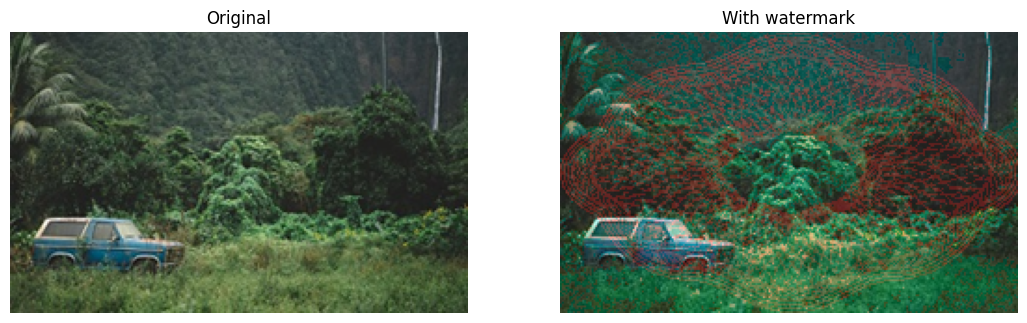

In [6]:
def build_wm_color(image, bit_plane):
  
    b_channel, g_channel, r_channel = cv2.split(image)

    bit_mask = np.uint8(1 << (bit_plane - 1))
    b_channel = (b_channel & ~bit_mask) | ((bin_wm == 0) * bit_mask)
    new_image = cv2.merge([b_channel, g_channel, r_channel])

    return new_image


bit_plane_blue = 7
new_image = build_wm_color(img, bit_plane_blue)

fig, axes = plt.subplots(1, 2, figsize=(13, 4))

axes[0].imshow(img, cmap="gray")
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(new_image, cmap="gray")
axes[1].set_title("With watermark")
axes[1].axis("off")

### 2. Здійснити вбудовування текстової інформації (яка представлена побітово) у вхідне зображення на основі методу найменшого значущого біта.

(np.float64(-0.5), np.float64(245.5), np.float64(150.5), np.float64(-0.5))

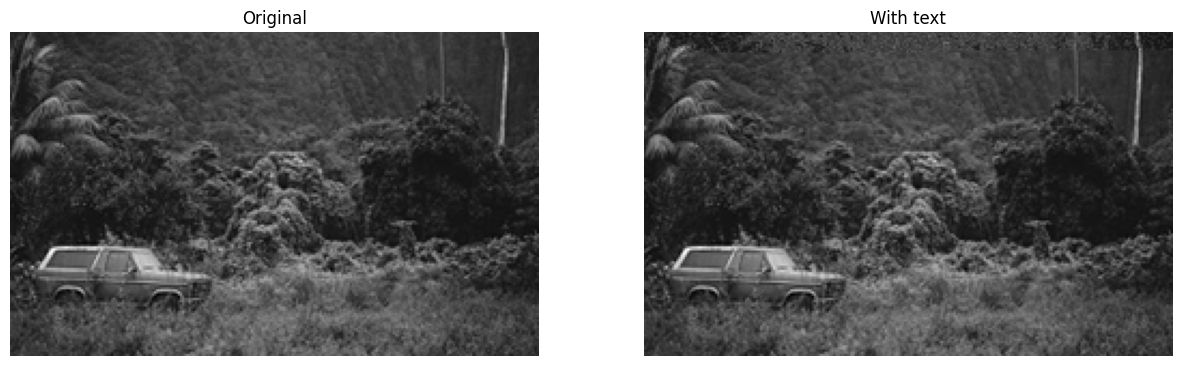

In [ ]:
def text_to_bits(text):
    return ''.join(format(ord(char), '08b') for char in text)

def text_lsb(image, text, bit_plane = 5):
    
    bit_string = text_to_bits(text) + '1110'
    
    watermarked_image = image.copy().flatten()

    bit_mask = np.uint8(1 << (bit_plane - 1))

    for i, bit in enumerate(bit_string):
        watermarked_image[i] = np.bitwise_and(watermarked_image[i], np.bitwise_not(bit_mask)) 
        watermarked_image[i] = np.bitwise_or(watermarked_image[i], np.uint8(int(bit) << (bit_plane - 1)))  

    watermarked_image = watermarked_image.reshape(image.shape)

    return watermarked_image

text = "Вбудовування інформації в найменш значущі біти контейнера - історично один з перших і, мабуть, найбільш відомий підхід, який може застосовуватися, як для стеганографії, так і для захисту сигналів цифровими водяними знаками."
watermarked_image = text_lsb(gray_img, text)


fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].imshow(gray_img, cmap="gray")
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(watermarked_image, cmap="gray")
axes[1].set_title("With text")
axes[1].axis("off")

### 3. Написати метод, який виконує вилучення вонядного знаку із заповненого конейнега (зображення з водяним знаком).

(np.float64(-0.5), np.float64(245.5), np.float64(150.5), np.float64(-0.5))

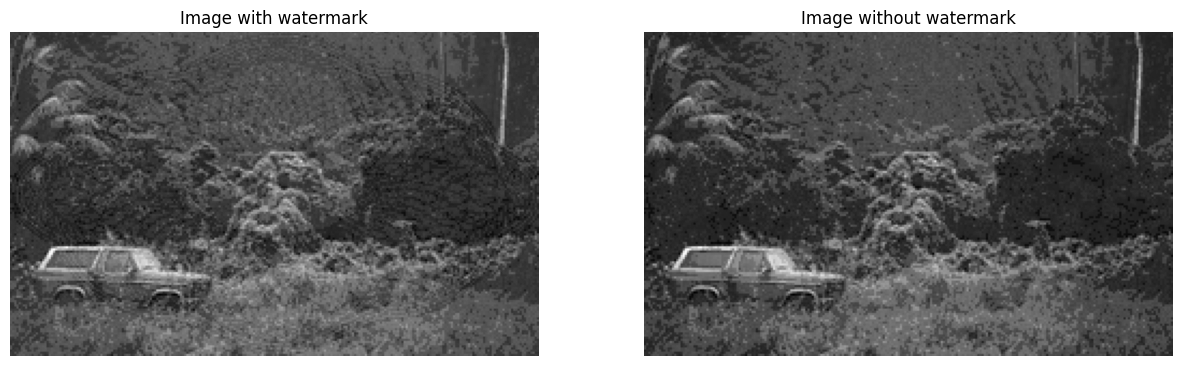

In [8]:
def return_img_gray(image, bit_plane):
    
    bit_mask = np.uint8(1 << (bit_plane - 1))  
    restored_image = np.bitwise_and(image, np.bitwise_not(bit_mask, dtype=np.uint8)) 
    
    return restored_image

img_without_wm = return_img_gray(img_with_wm, bit_plane)


fig, axes = plt.subplots(1, 2, figsize=(15, 7))

axes[0].imshow(img_with_wm, cmap="gray")
axes[0].set_title("Image with watermark")
axes[0].axis("off")

axes[1].imshow(img_without_wm, cmap="gray")
axes[1].set_title("Image without watermark")
axes[1].axis("off")

(np.float64(-0.5), np.float64(245.5), np.float64(150.5), np.float64(-0.5))

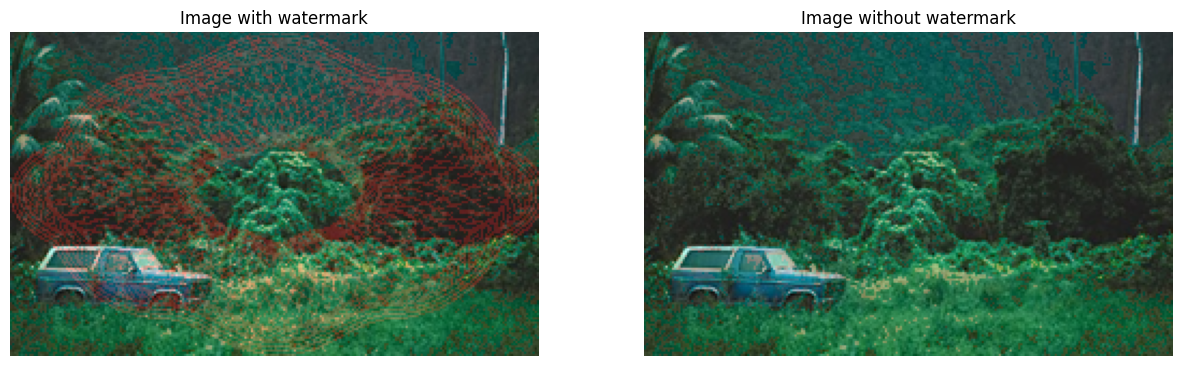

In [9]:
def return_img_color(watermarked_image, bit_plane):
  
    b_channel, g_channel, r_channel = cv2.split(watermarked_image)
    bit_mask = np.uint8(1 << (bit_plane - 1))
    b_channel_restored = np.bitwise_and(b_channel, np.bitwise_not(bit_mask, dtype=np.uint8))
    restored_image = cv2.merge([b_channel_restored, g_channel, r_channel])

    return restored_image

restored_img = return_img_color(new_image, bit_plane_blue)

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

axes[0].imshow(new_image)
axes[0].set_title("Image with watermark")
axes[0].axis("off")

axes[1].imshow(restored_img)
axes[1].set_title("Image without watermark")
axes[1].axis("off")


### 4. Реалізувати вбудовування повнокольорового зображення у GIF-файл, який має не менше 8 кадрів.Продемонструвати вбудовування і вилучення зображення з GIF-файлу.

In [10]:
gif = imageio.mimread("animation.gif")
gif_rgb = [frame[:, :, :3] for frame in gif]

def gif(gif, img):
    
    h, w, _ = img.shape
    new_frames = []

    for frame in gif:
        
        frame = cv2.resize(frame, (w, h))
        watermarked_frame = (frame & 0b11110000) | (img >> 4)
        new_frames.append(watermarked_frame)
    
    output_gif = "animation_new.gif"
    imageio.mimsave(output_gif, new_frames, format='GIF', duration=100)
    
    return output_gif 

output_gif = gif(gif_rgb, img)

gif_frames = imageio.mimread(output_gif)

for frame in gif_frames:
    cv2.imshow("GIF Animation", cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
    if cv2.waitKey(100) & 0xFF == 27:  
        break

cv2.destroyAllWindows()